In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
#import cartopy.crs as ccrs

from salishsea_tools import visualisations as vis
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places
import netCDF4 as nc
import pickle
#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [2]:
#open bathymetry grid
grid = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
meshmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

BR3_DIC_winter = pickle.load(open('../pkls/BR3_DIC_winter_mean.pkl', 'rb'))  
BR3_DIC_summer = pickle.load(open('../pkls/BR3_DIC_summer_mean.pkl', 'rb'))
BR3_DIC_fullyear_mean = pickle.load(open('../pkls/BR3_DIC_fullyear_mean.pkl', 'rb'))
BR3_sal_summer = pickle.load(open('../pkls/BR3_sal_summer_mean.pkl', 'rb')) 
#BR3_DIC_fullyear_mean

In [3]:
flag ='../pkls/BR3_flagellates_means_inletsIN.pkl'
diat ='../pkls/BR3_diatoms_means_inletsIN.pkl'
cili ='../pkls/BR3_ciliates_means_inletsIN.pkl'
csd = '../pkls/cellsize_alg2.pkl'

flag_mas = pickle.load(open(flag, 'rb'))  
diat_mas = pickle.load(open(diat, 'rb'))
cili_mas = pickle.load(open(cili, 'rb'))
csize = pickle.load(open(csd, 'rb'))

mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (mmask['e3t_1d'][:])

mask_broad = np.zeros([40,365])

for i in range(0,365):
    mask_broad[:,i] = depths


flag_mas_mm_m2 = np.nansum((mask_broad*flag_mas),axis = 0)
diat_mas_mm_m2 = np.nansum((mask_broad*diat_mas),axis = 0)
cili_mas_mm_m2 = np.nansum((mask_broad*cili_mas),axis = 0)

In [4]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
depths = mesh['gdept_1d'][:]
zdepth = depths[0]   
#make a long 3-year dataset to be able to compare spinup progress for BR run

In [5]:
BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 

BR3_var_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
BR3_var_cs = pickle.load(open('../pkls/BR3_DIC_means_cs_BOX.pkl','rb'))
BR3_var_ns = pickle.load(open('../pkls/BR3_DIC_means_ns_BOX.pkl','rb'))
BR3_var_haro = pickle.load(open('../pkls/BR3_DIC_means_haro_BOX.pkl','rb'))

BR3_var_jdf2 = pickle.load(open('../pkls/BR3_DIC_means_jdf2_BOX.pkl','rb'))
BR3_var_cs2 = pickle.load(open('../pkls/BR3_DIC_means_cs2_BOX.pkl','rb'))
BR3_var_ns2 = pickle.load(open('../pkls/BR3_DIC_means_ns2_BOX.pkl','rb'))
BR3_var_haro2 = pickle.load(open('../pkls/BR3_DIC_means_haro2_BOX.pkl','rb'))

BR3_var_jdf3 = pickle.load(open('../pkls/BR3_DIC_means_jdf3_BOX.pkl','rb'))
BR3_var_cs3 = pickle.load(open('../pkls/BR3_DIC_means_cs3_BOX.pkl','rb'))
BR3_var_ns3 = pickle.load(open('../pkls/BR3_DIC_means_ns3_BOX.pkl','rb'))
BR3_var_haro3 = pickle.load(open('../pkls/BR3_DIC_means_haro3_BOX.pkl','rb'))

BR3_dp = np.nanmean(BR3_var, axis =1)

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)

BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)
BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)
BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)
BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)

BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)
BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)
BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)
BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)

In [6]:
PI9_var = pickle.load(open('../pkls/PI9_DIC_means_inletsIN.pkl' , 'rb')) 

PI9_var_jdf = pickle.load(open('../pkls/PI9_DIC_means_jdf_BOX.pkl','rb'))
PI9_var_cs = pickle.load(open('../pkls/PI9_DIC_means_cs_BOX.pkl','rb'))
PI9_var_ns = pickle.load(open('../pkls/PI9_DIC_means_ns_BOX.pkl','rb'))
PI9_var_haro = pickle.load(open('../pkls/PI9_DIC_means_haro_BOX.pkl','rb'))

PI9_var_jdf2 = pickle.load(open('../pkls/PI9_DIC_means_jdf2_BOX.pkl','rb'))
PI9_var_cs2 = pickle.load(open('../pkls/PI9_DIC_means_cs2_BOX.pkl','rb'))
PI9_var_ns2 = pickle.load(open('../pkls/PI9_DIC_means_ns2_BOX.pkl','rb'))
PI9_var_haro2 = pickle.load(open('../pkls/PI9_DIC_means_haro2_BOX.pkl','rb'))

PI9_var_jdf3 = pickle.load(open('../pkls/PI9_DIC_means_jdf3_BOX.pkl','rb'))
PI9_var_cs3 = pickle.load(open('../pkls/PI9_DIC_means_cs3_BOX.pkl','rb'))
PI9_var_ns3 = pickle.load(open('../pkls/PI9_DIC_means_ns3_BOX.pkl','rb'))
PI9_var_haro3 = pickle.load(open('../pkls/PI9_DIC_means_haro3_BOX.pkl','rb'))

PI9_var_ps = pickle.load(open('../pkls/PI9_DIC_means_ps_BOX.pkl','rb'))
PI9_var_ps2 = pickle.load(open('../pkls/PI9_DIC_means_ps2_BOX.pkl','rb'))
PI9_ps_dp = np.nanmean(PI9_var_ps, axis =1)
PI9_ps2_dp = np.nanmean(PI9_var_ps2, axis =1)
BR3_var_ps = pickle.load(open('../pkls/BR3_DIC_means_ps_BOX.pkl','rb'))
BR3_var_ps2 = pickle.load(open('../pkls/BR3_DIC_means_ps2_BOX.pkl','rb'))
BR3_ps_dp = np.nanmean(BR3_var_ps, axis =1)
BR3_ps2_dp = np.nanmean(BR3_var_ps2, axis =1)

PI9_dp = np.nanmean(PI9_var, axis =1)

PI9_jdf_dp = np.nanmean(PI9_var_jdf, axis =1)
PI9_cs_dp = np.nanmean(PI9_var_cs, axis =1)
PI9_ns_dp = np.nanmean(PI9_var_ns, axis =1)
PI9_haro_dp = np.nanmean(PI9_var_haro, axis =1)

PI9_jdf2_dp = np.nanmean(PI9_var_jdf2, axis =1)
PI9_cs2_dp = np.nanmean(PI9_var_cs2, axis =1)
PI9_ns2_dp = np.nanmean(PI9_var_ns2, axis =1)
PI9_haro2_dp = np.nanmean(PI9_var_haro2, axis =1)

PI9_jdf3_dp = np.nanmean(PI9_var_jdf3, axis =1)
PI9_cs3_dp = np.nanmean(PI9_var_cs3, axis =1)
PI9_ns3_dp = np.nanmean(PI9_var_ns3, axis =1)
PI9_haro3_dp = np.nanmean(PI9_var_haro3, axis =1)

In [7]:
PI6_var = pickle.load(open('../pkls/PI6_DIC_means_inletsIN.pkl' , 'rb')) 

PI6_var_jdf = pickle.load(open('../pkls/PI6_DIC_means_jdf_BOX.pkl','rb'))
PI6_var_cs = pickle.load(open('../pkls/PI6_DIC_means_cs_BOX.pkl','rb'))
PI6_var_ns = pickle.load(open('../pkls/PI6_DIC_means_ns_BOX.pkl','rb'))
PI6_var_haro = pickle.load(open('../pkls/PI6_DIC_means_haro_BOX.pkl','rb'))

PI6_var_jdf2 = pickle.load(open('../pkls/PI6_DIC_means_jdf2_BOX.pkl','rb'))
PI6_var_cs2 = pickle.load(open('../pkls/PI6_DIC_means_cs2_BOX.pkl','rb'))
PI6_var_ns2 = pickle.load(open('../pkls/PI6_DIC_means_ns2_BOX.pkl','rb'))
PI6_var_haro2 = pickle.load(open('../pkls/PI6_DIC_means_haro2_BOX.pkl','rb'))

PI6_var_jdf3 = pickle.load(open('../pkls/PI6_DIC_means_jdf3_BOX.pkl','rb'))
PI6_var_cs3 = pickle.load(open('../pkls/PI6_DIC_means_cs3_BOX.pkl','rb'))
PI6_var_ns3 = pickle.load(open('../pkls/PI6_DIC_means_ns3_BOX.pkl','rb'))
PI6_var_haro3 = pickle.load(open('../pkls/PI6_DIC_means_haro3_BOX.pkl','rb'))

PI6_dp = np.nanmean(PI6_var, axis =1)

PI6_jdf_dp = np.nanmean(PI6_var_jdf, axis =1)
PI6_cs_dp = np.nanmean(PI6_var_cs, axis =1)
PI6_ns_dp = np.nanmean(PI6_var_ns, axis =1)
PI6_haro_dp = np.nanmean(PI6_var_haro, axis =1)

PI6_jdf2_dp = np.nanmean(PI6_var_jdf2, axis =1)
PI6_cs2_dp = np.nanmean(PI6_var_cs2, axis =1)
PI6_ns2_dp = np.nanmean(PI6_var_ns2, axis =1)
PI6_haro2_dp = np.nanmean(PI6_var_haro2, axis =1)

PI6_jdf3_dp = np.nanmean(PI6_var_jdf3, axis =1)
PI6_cs3_dp = np.nanmean(PI6_var_cs3, axis =1)
PI6_ns3_dp = np.nanmean(PI6_var_ns3, axis =1)
PI6_haro3_dp = np.nanmean(PI6_var_haro3, axis =1)

In [8]:
PI7_var = pickle.load(open('../pkls/PI7_DIC_means_inletsIN.pkl' , 'rb')) 

PI7_var_jdf = pickle.load(open('../pkls/PI7_DIC_means_jdf_BOX.pkl','rb'))
PI7_var_cs = pickle.load(open('../pkls/PI7_DIC_means_cs_BOX.pkl','rb'))
PI7_var_ns = pickle.load(open('../pkls/PI7_DIC_means_ns_BOX.pkl','rb'))
PI7_var_haro = pickle.load(open('../pkls/PI7_DIC_means_haro_BOX.pkl','rb'))

PI7_var_jdf2 = pickle.load(open('../pkls/PI7_DIC_means_jdf2_BOX.pkl','rb'))
PI7_var_cs2 = pickle.load(open('../pkls/PI7_DIC_means_cs2_BOX.pkl','rb'))
PI7_var_ns2 = pickle.load(open('../pkls/PI7_DIC_means_ns2_BOX.pkl','rb'))
PI7_var_haro2 = pickle.load(open('../pkls/PI7_DIC_means_haro2_BOX.pkl','rb'))

PI7_var_jdf3 = pickle.load(open('../pkls/PI7_DIC_means_jdf3_BOX.pkl','rb'))
PI7_var_cs3 = pickle.load(open('../pkls/PI7_DIC_means_cs3_BOX.pkl','rb'))
PI7_var_ns3 = pickle.load(open('../pkls/PI7_DIC_means_ns3_BOX.pkl','rb'))
PI7_var_haro3 = pickle.load(open('../pkls/PI7_DIC_means_haro3_BOX.pkl','rb'))

PI7_dp = np.nanmean(PI7_var, axis =1)

PI7_jdf_dp = np.nanmean(PI7_var_jdf, axis =1)
PI7_cs_dp = np.nanmean(PI7_var_cs, axis =1)
PI7_ns_dp = np.nanmean(PI7_var_ns, axis =1)
PI7_haro_dp = np.nanmean(PI7_var_haro, axis =1)

PI7_jdf2_dp = np.nanmean(PI7_var_jdf2, axis =1)
PI7_cs2_dp = np.nanmean(PI7_var_cs2, axis =1)
PI7_ns2_dp = np.nanmean(PI7_var_ns2, axis =1)
PI7_haro2_dp = np.nanmean(PI7_var_haro2, axis =1)

PI7_jdf3_dp = np.nanmean(PI7_var_jdf3, axis =1)
PI7_cs3_dp = np.nanmean(PI7_var_cs3, axis =1)
PI7_ns3_dp = np.nanmean(PI7_var_ns3, axis =1)
PI7_haro3_dp = np.nanmean(PI7_var_haro3, axis =1)

In [9]:
PI8_var = pickle.load(open('../pkls/PI8_DIC_means_inletsIN.pkl' , 'rb')) 

PI8_var_jdf = pickle.load(open('../pkls/PI8_DIC_means_jdf_BOX.pkl','rb'))
PI8_var_cs = pickle.load(open('../pkls/PI8_DIC_means_cs_BOX.pkl','rb'))
PI8_var_ns = pickle.load(open('../pkls/PI8_DIC_means_ns_BOX.pkl','rb'))
PI8_var_haro = pickle.load(open('../pkls/PI8_DIC_means_haro_BOX.pkl','rb'))

PI8_var_jdf2 = pickle.load(open('../pkls/PI8_DIC_means_jdf2_BOX.pkl','rb'))
PI8_var_cs2 = pickle.load(open('../pkls/PI8_DIC_means_cs2_BOX.pkl','rb'))
PI8_var_ns2 = pickle.load(open('../pkls/PI8_DIC_means_ns2_BOX.pkl','rb'))
PI8_var_haro2 = pickle.load(open('../pkls/PI8_DIC_means_haro2_BOX.pkl','rb'))

PI8_var_jdf3 = pickle.load(open('../pkls/PI8_DIC_means_jdf3_BOX.pkl','rb'))
PI8_var_cs3 = pickle.load(open('../pkls/PI8_DIC_means_cs3_BOX.pkl','rb'))
PI8_var_ns3 = pickle.load(open('../pkls/PI8_DIC_means_ns3_BOX.pkl','rb'))
PI8_var_haro3 = pickle.load(open('../pkls/PI8_DIC_means_haro3_BOX.pkl','rb'))

PI8_dp = np.nanmean(PI8_var, axis =1)

PI8_jdf_dp = np.nanmean(PI8_var_jdf, axis =1)
PI8_cs_dp = np.nanmean(PI8_var_cs, axis =1)
PI8_ns_dp = np.nanmean(PI8_var_ns, axis =1)
PI8_haro_dp = np.nanmean(PI8_var_haro, axis =1)

PI8_jdf2_dp = np.nanmean(PI8_var_jdf2, axis =1)
PI8_cs2_dp = np.nanmean(PI8_var_cs2, axis =1)
PI8_ns2_dp = np.nanmean(PI8_var_ns2, axis =1)
PI8_haro2_dp = np.nanmean(PI8_var_haro2, axis =1)

PI8_jdf3_dp = np.nanmean(PI8_var_jdf3, axis =1)
PI8_cs3_dp = np.nanmean(PI8_var_cs3, axis =1)
PI8_ns3_dp = np.nanmean(PI8_var_ns3, axis =1)
PI8_haro3_dp = np.nanmean(PI8_var_haro3, axis =1)

In [10]:
intr = BR3_dp-PI9_dp
intr_ns3 = BR3_ns3_dp-PI9_ns3_dp
print(np.max(intr_ns3[0:10]))
print(np.min(intr_ns3[0:10]))
intr_ns2 = BR3_ns2_dp-PI9_ns2_dp
print(np.max(intr_ns2[0:10]))
print(np.min(intr_ns2[0:10]))
intr_ns = BR3_ns_dp-PI9_ns_dp
print(np.max(intr_ns[0:10]))
print(np.min(intr_ns[0:10]))

#print(np.shape(csize))
csize_layer1 = np.nansum(csize,axis = 1)
csize_layer = np.nansum(csize_layer1,axis = 1)
#print((csize_layer))

print(np.nansum((intr*csize_layer)/np.nansum(csize_layer)))

35.16631695473029
34.460594365368024
37.45464970836906
36.09534427172525
37.18881668717904
34.96786908711465
34.33554031622314


In [11]:

print(np.nanmin(BR3_var-PI9_var))
print(np.nanmax(BR3_var-PI9_var))

21.6527099609375
39.7919921875


In [12]:

intr_ps2 = BR3_ps2_dp-PI9_ps2_dp
print(np.max(intr_ps2[0:10]))
print(np.min(intr_ps2[0:10]))
intr_ps = BR3_ps_dp-PI9_ps_dp
print(np.max(intr_ps[0:10]))
print(np.min(intr_ps[0:10]))


34.50984522153249
34.27431473405386
33.75729512253861
33.470496441566866


In [13]:
intr_haro3 = BR3_haro3_dp-PI9_haro3_dp
print(np.max(intr_haro3[0:10]))
print(np.min(intr_haro3[0:10]))
intr_haro2 = BR3_haro2_dp-PI9_haro2_dp
print(np.max(intr_haro2[0:10]))
print(np.min(intr_haro2[0:10]))
intr_haro = BR3_haro_dp-PI9_haro_dp
print(np.max(intr_haro[0:10]))
print(np.min(intr_haro[0:10]))

34.95880745665659
34.62990923319785
34.760776969178096
34.059367976776684
34.396263645119916
34.356504508240505


In [14]:
print(intr[26])
print(zdepth[26])

33.821054286172966
98.06295924154529


## stations etc

In [15]:
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

nav_lon = (grid['nav_lon'][:])
nav_lat = (grid['nav_lat'][:])
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


xs_list = [jdf_x, jdf2_x, jdf3_x,cs_x, cs2_x, cs3_x,haro_x, haro2_x, haro3_x,ns_x, ns2_x, ns3_x]
ys_list = [jdf_y, jdf2_y, jdf3_y,cs_y, cs2_y, cs3_y,haro_y, haro2_y, haro3_y,ns_y, ns2_y, ns3_y]
cols_list = ['teal', 'mediumaquamarine',  'lightseagreen',  'royalblue', 'navy',\
 'dodgerblue', 'tomato','firebrick','indianred',  'olive', 'yellowgreen', 'palegoldenrod']

for i in range(0, len(xs_list)):
    tx = xs_list[i]; ty = ys_list[i]
    tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]
#     print(tlon)
#     print(tlat)

lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)
thal_lon = np.zeros(1533)
thal_lat = np.zeros(1533)

for i in range(0,len(thal_lon)):
    ty = lines[i,0]
    tx = lines[i,1]
    thal_lon[i] = (nav_lon[ty,tx])
    thal_lat[i] = (nav_lat[ty,tx])


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


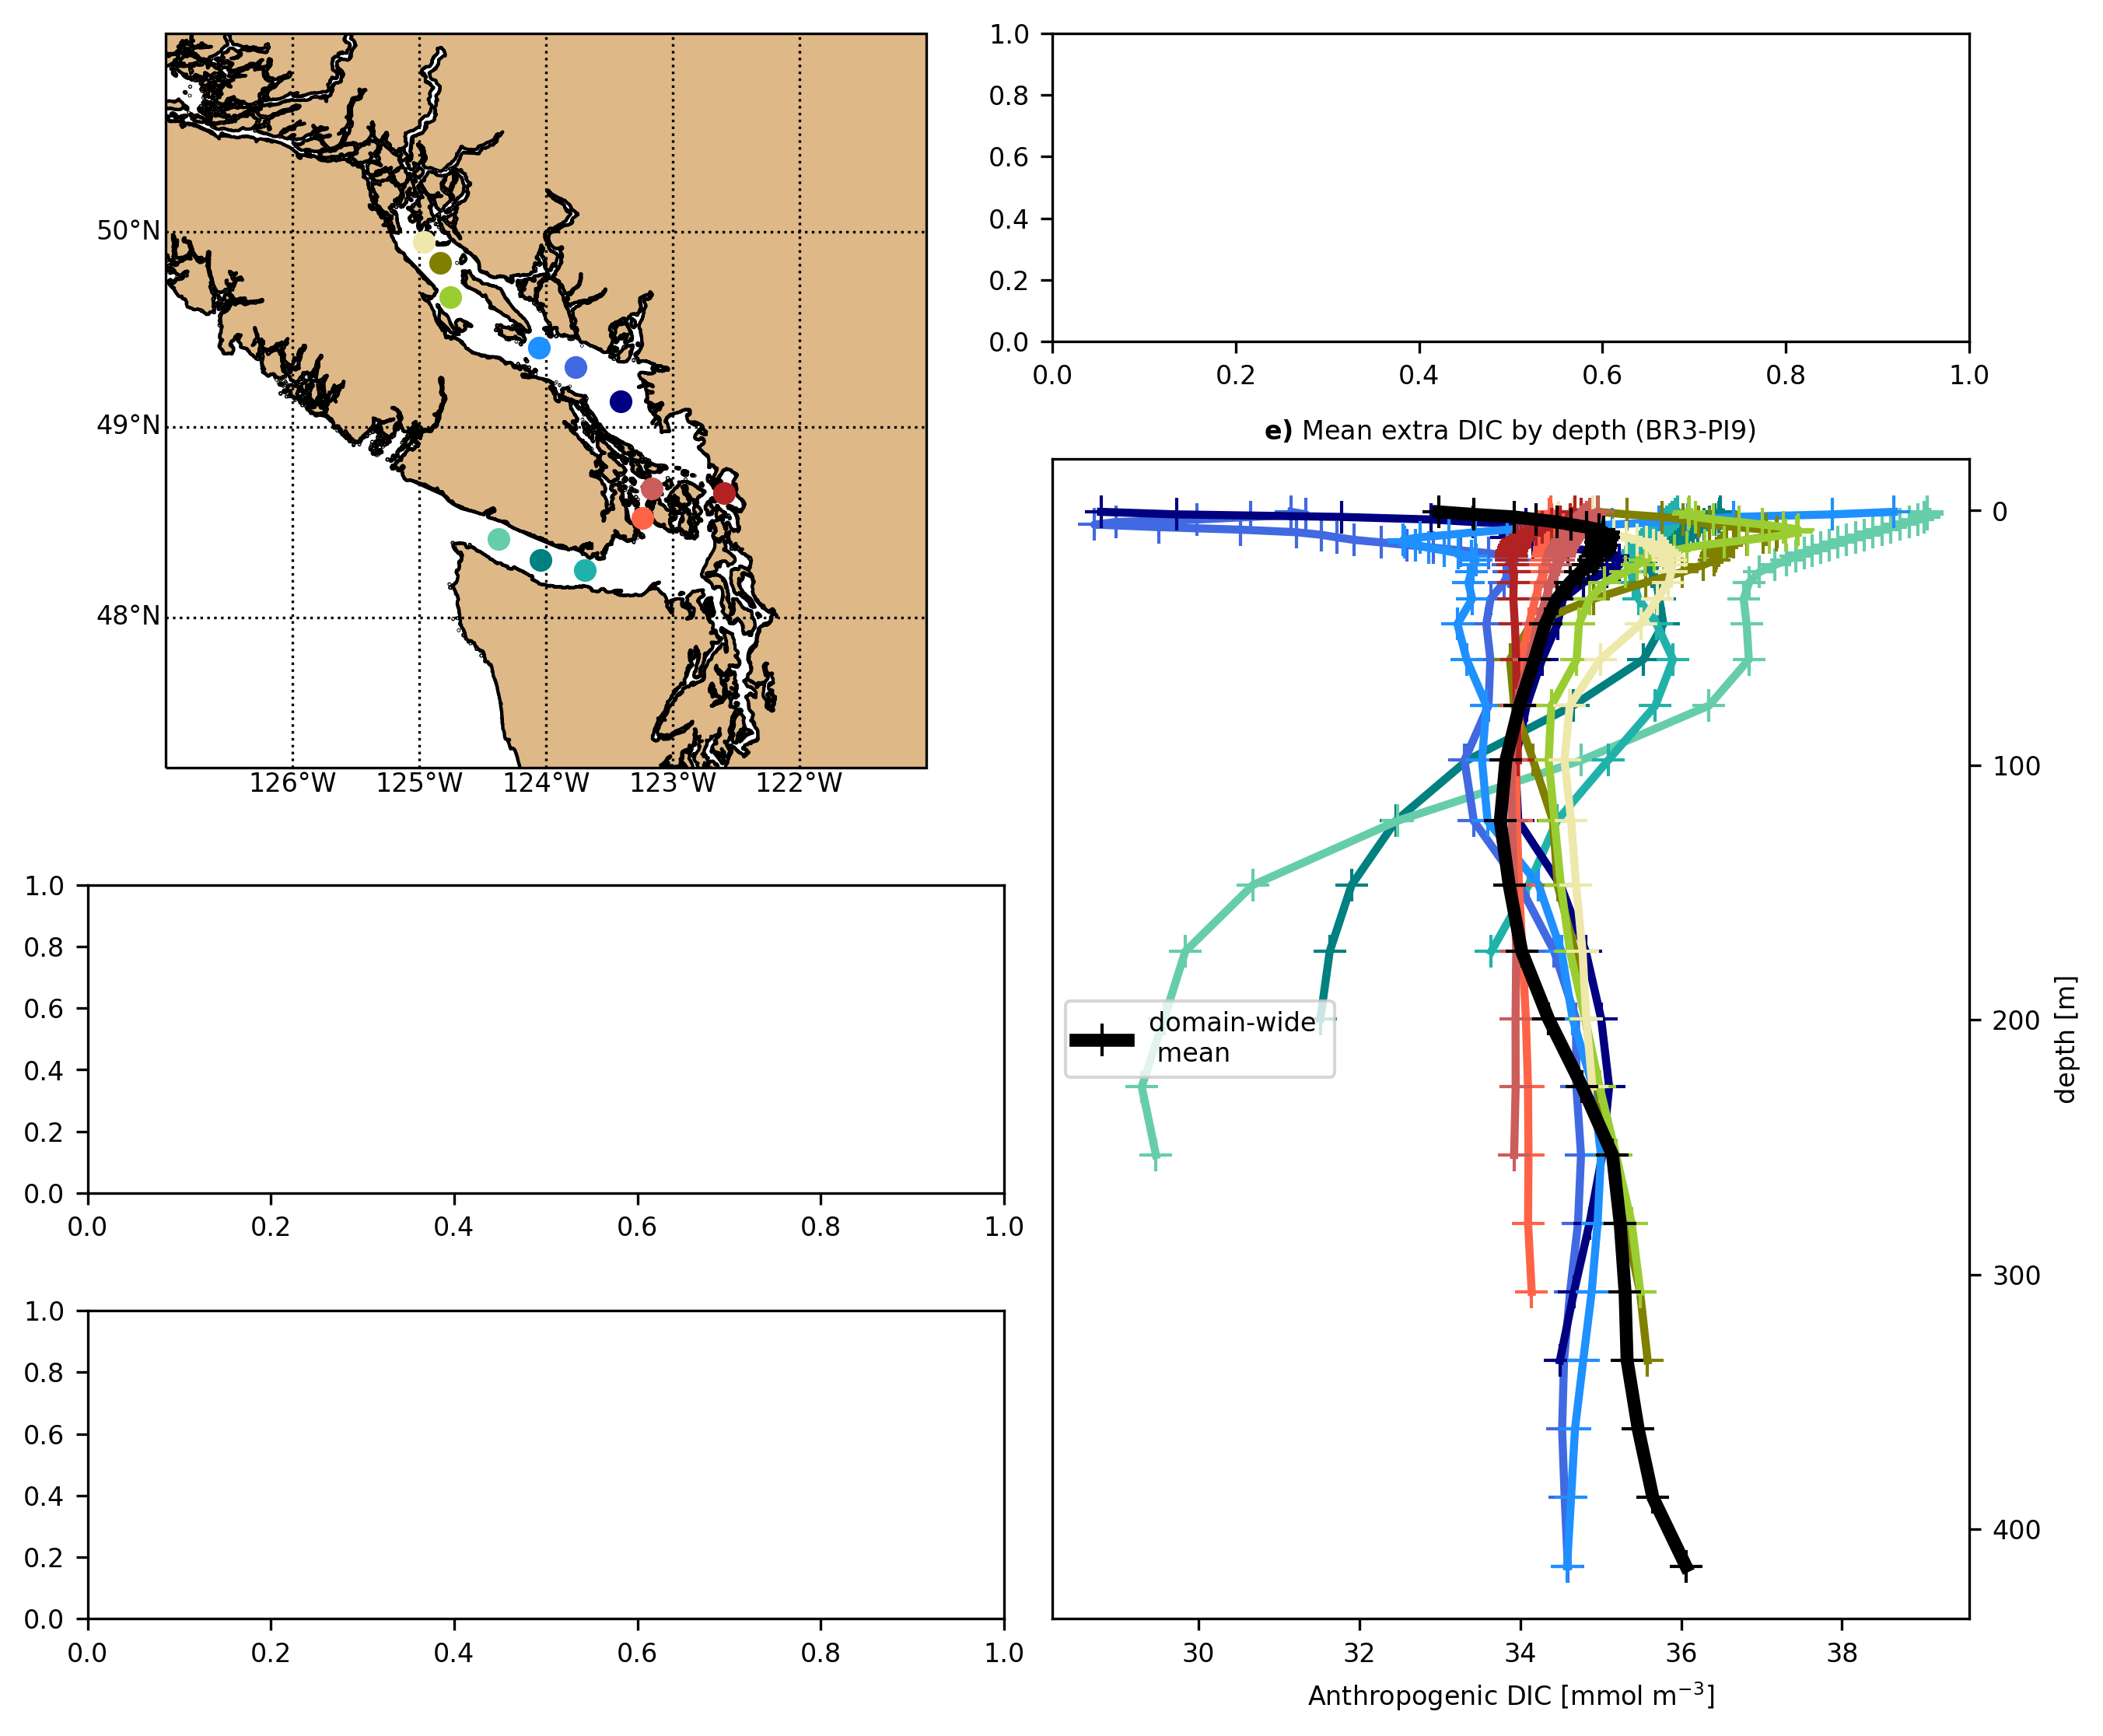

In [16]:
ms = 6

tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fact = 1/72; fs = 8
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rcParams['font.size'] = 8

#plt.rcParams["font.family"] = "cursive"
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

fig = plt.figure(figsize=(23/2.54, 19/2.54),dpi = 300)
gs = fig.add_gridspec(4, 4)

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

############# ax1 
#domain plot - BR run summer average
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')
xlim, ylim = [-128, -121.5], [47.2, 51.0]
ax = fig.add_subplot(gs[0:2, 0:2], projection=crs.Mercator(central_longitude=-124))
ax.set_extent([-127, -121, 47.2, 51.0], crs=crs.PlateCarree())

# Draw coastline
ax.coastlines()
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

for i in range(0, len(xs_list)):
    tx = xs_list[i]; ty = ys_list[i]
    tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]

    w =ax.plot(tlon,tlat,marker = 'o', color = cols_list[i], markersize=ms, transform=crs.Geodetic())

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
#gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

ax1 = plt.subplot2grid((4,4), (2,0), colspan=2, rowspan=1) 
#bio, river
ax2 = plt.subplot2grid((4,4), (3,0), colspan=2, rowspan=1) 
### thalweg
ax3 = plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=1)

ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=3) 

ax3.plot(BR3_jdf_dp-PI9_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf2_dp-PI9_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf3_dp-PI9_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BR3_cs_dp-PI9_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs2_dp-PI9_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs3_dp-PI9_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BR3_ns_dp-PI9_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns2_dp-PI9_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns3_dp-PI9_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BR3_haro_dp-PI9_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro2_dp-PI9_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro3_dp-PI9_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BR3_dp-PI9_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')

#ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (present-day - preindustrial) ', fontsize = 8)
ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (BR3-PI9) ', fontsize = 8)
ax3.invert_yaxis()
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.legend(loc = 'center left', fontsize = fs)
ax3.set_xlabel('Anthropogenic DIC [mmol m$^{-3}$]', fontsize = fs)
ax3.set_ylabel('depth [m]', fontsize = fs)
plt.tight_layout()
fig.savefig('MF_DOMAIN_BR3-PI9.jpg')
# 

In [17]:
# ms = 6
# Fraser_discharge = pickle.load(open('../pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  
# tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# fact = 1/72; fs = 8
# plt.rc('xtick',labelsize=8)
# plt.rc('ytick',labelsize=8)
# plt.rcParams['font.size'] = 8

# #plt.rcParams["font.family"] = "cursive"
# plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# fig = plt.figure(figsize=(23/2.54, 19/2.54),dpi = 300)
# gs = fig.add_gridspec(4, 4)

# #figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# ############# ax1 
# #domain plot - BR run summer average
# mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')
# xlim, ylim = [-128, -121.5], [47.2, 51.0]
# ax = fig.add_subplot(gs[0:2, 0:2], projection=crs.Mercator(central_longitude=-124))
# ax.set_extent([-127, -121, 47.2, 51.0], crs=crs.PlateCarree())

# # Draw coastline
# ax.coastlines()
# ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# tdat_p = BR3_sal_summer[0,:,:]
# # Overlay bathymetry
# c = ax.contourf(
#     grid.nav_lon, grid.nav_lat, tdat_p, levels=np.arange(0, 33.0, 0.25), 
#     cmap=cm.haline, extend = 'both', transform=crs.PlateCarree(), zorder=2,
# )

# #Overlay domain landmask and coastline
# for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
#     getattr(ax, attr)(
#         grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
#         levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
#     )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# ax.plot(-124,50, marker = 'o', markersize = 68, color = 'teal', zorder = 10)

# for i in range(0, len(xs_list)):
#     tx = xs_list[i]; ty = ys_list[i]
#     tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]
# #     print(tlon)
# #     print(tlat)
#     w =ax.plot(tlon,tlat,marker = 'o', color = cols_list[i], markersize=ms, transform=crs.Geodetic())
# #ax.plot(-124,50, 'bo', markersize=7, transform=ccrs.Geodetic())

# # Add gridlines
# xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
# gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
# #gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# gl.xlabels_top, gl.ylabels_right = False, False

# cax = fig.add_axes([0.7, 0.30, 0.015, 0.6])
# tticks = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5]
# fig.colorbar(c, cax=cax, orientation='vertical', label='mean summer salinity [g/kg]', ticks = tticks)




# # Draw coastline
# ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# tdat_p = BR3_sal_summer[0,:,:]
# # Overlay bathymetry
# c = ax.contourf(
#     grid.nav_lon, grid.nav_lat, tdat_p, levels=np.arange(0, 33.0, 0.25), 
#     cmap=cm.haline, extend = 'both', transform=crs.PlateCarree(), zorder=2,
# )

# #Overlay domain landmask and coastline
# for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
#     getattr(ax, attr)(
#         grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
#         levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
#     )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# # Add gridlines
# xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
# gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
# gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# gl.xlabels_top, gl.ylabels_right = False, False

# cax = fig.add_axes([0.6, 0.30, 0.015, 0.6])
# tticks = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5]

# #############################




# ax1 = plt.subplot2grid((4,4), (2,0), colspan=2, rowspan=1) 
# depth = tmesh['e3t_0'][0,:,250,250]; shift = 2; seg = 45; lw = 1
# tcm = cm.dense
# depths = tmesh['gdept_1d'][:]
# zdepths = depths[0]
# for i in range(0,40):
#     td = zdepths[i]
#     ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
#     if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
#         | (i == 27) | (i == 35 ) ) :
#         ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
#                 label = str(int(td))+' m', linewidth = lw+1)
# #ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
# ax1.legend(bbox_to_anchor=[1, 1.1], fontsize = 8, ncol = 1)
# plt.xlim([0,365*1])
# plt.ylim([1440,2180])
# plt.grid()
# #ax1.set_xlabel('day of year', fontsize = 8)
# ax1.set_xticks([0,50,100,150,200,250,300,350])
# ax1.set_ylabel('mmol m$^{-3}$', fontsize = 8)
# #ax1.set_title(r'$\bf{a)}$ Model domain showing analyzed stations',y=1.1)
# ax1.set_title(r'$\bf{b)}$ By-layer domain mean DIC concentration', fontsize = 8)

# #bio, river
# ax2 = plt.subplot2grid((4,4), (3,0), colspan=2, rowspan=1) 
# ax2b =ax2.twinx()
# ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 2, label = 'Fraser river discharge')
# ax2.grid()
# ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
#           color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 2)
# ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
#                  color = 'darkseagreen', alpha = 0.2 )

# ax2b.legend(loc = 'lower center', fontsize = fs); ax2.legend(loc = 'upper right', fontsize = fs)
# ax2b.set_ylabel('mmol N m$^{-2}$', fontsize = fs); ax2.set_xlabel('day of year', fontsize = fs)
# ax2.set_ylabel('m$^3$ s$^{-1}$', fontsize = fs)
# ax2.set_xticks([0,50,100,150,200,250,300,350])
# plt.xlim([0,365]); ax2b.set_ylim([0,130])
# ax2.set_title(r'$\bf{c)}$ Freshwater discharge and phytoplankton biomass', fontsize = 8)

# ### thalweg
# ax3 = plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=1)
# cbar = \
# vis.contour_thalweg(ax3, BR3_DIC_fullyear_mean, bathy, meshmask,\
#                     np.arange(1900, 2200, 20), cmap = cm.matter)
# ax3.set_title(r'$\bf{d)}$ Year Average DIC (present-day)',fontsize = 8)
# ax3.set_xlabel('Distance along thalweg [km]',fontsize = 8)
# cbar.ax.tick_params(labelsize=8) 
# cbar.set_label('DIC [mmol m$^{-3}$]', fontsize = 8)
# ax3.tick_params(axis='both', which='major', labelsize=fs)
# #ax3.text(0.03, 0.03, 'd)', transform=ax3.transAxes, fontsize=8, fontweight='bold', va='bottom')
# ax3.tick_params(axis='both', which='major', labelsize=8)
# ax3.text(0.15, 0.11, 'Ocean \n Exchange', transform=ax3.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')
# ax3.text(0.875, 0.11, 'Northern \n Fjord', transform=ax3.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')

# #depth profile
# ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=3) 

# ax3.plot(BR3_jdf_dp-PI9_jdf_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
# ax3.plot(BR3_jdf2_dp-PI9_jdf2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
# ax3.plot(BR3_jdf3_dp-PI9_jdf3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

# ax3.plot(BR3_cs_dp-PI9_cs_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
# ax3.plot(BR3_cs2_dp-PI9_cs2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
# ax3.plot(BR3_cs3_dp-PI9_cs3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

# ax3.plot(BR3_ns_dp-PI9_ns_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
# ax3.plot(BR3_ns2_dp-PI9_ns2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
# ax3.plot(BR3_ns3_dp-PI9_ns3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

# ax3.plot(BR3_haro_dp-PI9_haro_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
# ax3.plot(BR3_haro2_dp-PI9_haro2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
# ax3.plot(BR3_haro3_dp-PI9_haro3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

# ax3.plot(BR3_dp-PI9_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 4, color = 'k',\
#          markersize = 10, label = 'domain-wide \n mean')

# ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (present-day - preindustrial) ', fontsize = 8)
# #ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (BR3-PI9) ', fontsize = 8)
# ax3.invert_yaxis()
# ax3.yaxis.set_label_position("right")
# ax3.yaxis.tick_right()
# ax3.legend(loc = 'center left', fontsize = fs)
# ax3.set_xlabel('Anthropogenic DIC [mmol m$^{-3}$]', fontsize = fs)
# ax3.set_ylabel('depth [m]', fontsize = fs)
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# fig.savefig('MF_DOMAIN_BR3-PI9.jpg')
# # 

In [18]:
intr = BR3_dp-PI8_dp
print(np.shape(csize))
csize_layer1 = np.nansum(csize,axis = 1)
csize_layer = np.nansum(csize_layer1,axis = 1)
print((csize_layer))

print(np.nansum((intr*csize_layer)/np.nansum(csize_layer)))

(40, 898, 398)
[17730278930.479958 17730347370.631905 17730480673.787052
 17730740312.658318 16997176505.246202 16874149793.795547
 16751694446.911232 16646568410.42559 16514973695.297358
 16403750635.309036 16299940186.29875 16228020753.989017
 16195225772.443077 16237200199.78711 16464450409.119404
 17012657738.396297 18177117073.82859 20503377738.055313 24977582540.8144
 33341632036.200733 48181544643.08853 72610495319.3313 108627543518.70749
 151733782510.2329 189792852280.57523 210500557862.93567 209938091530.9837
 193571647210.41797 167336722040.633 134523217320.31241 101843988049.88788
 79680113283.59392 63215628838.41362 52615581231.11301 42936590524.341255
 32588706897.182045 23263168310.79526 16979418854.450266 10431313390.36983
 0.0]
35.21666207291861


(40,)
(40, 365)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


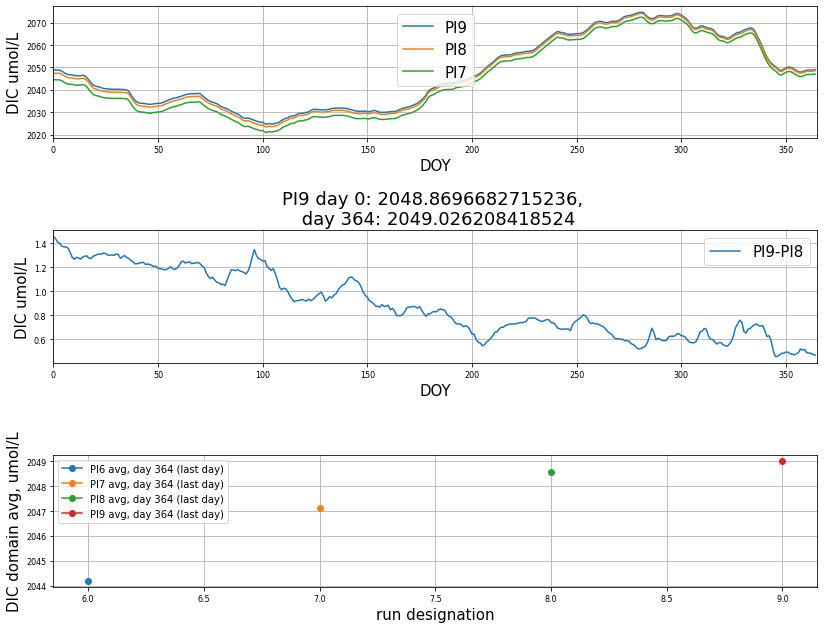

In [19]:
layersize = np.nansum(np.nansum(csize,axis=1),axis=1)
print(np.shape(layersize))
print(np.shape(PI9_var))
PI9_avg = np.zeros(365)
PI8_avg = np.zeros(365)
PI7_avg = np.zeros(365)
PI6_avg = np.zeros(365)

for i in range(0,365):
    PI8_avg[i] = np.nansum(PI8_var[:,i]*layersize)/np.nansum(layersize)
    #print(w)
    


for i in range(0,365):
    PI7_avg[i] = np.nansum(PI7_var[:,i]*layersize)/np.nansum(layersize)
    #print(w)
    
    
BR3_avg = np.zeros(365)

for i in range(0,365):
    BR3_avg[i] = np.nansum(BR3_var[:,i]*layersize)/np.nansum(layersize)
    #print(w)
    
for i in range(0,365):
    PI9_avg[i] = np.nansum(PI9_var[:,i]*layersize)/np.nansum(layersize)
    #print(w)

for i in range(0,365):
    PI6_avg[i] = np.nansum(PI6_var[:,i]*layersize)/np.nansum(layersize)
    #print(w)
    
# plt.plot(np.arange(0,365,1),PI9_avg, label = 'PI9')
# plt.plot(np.arange(0,365,1),PI8_avg, label = 'PI8')
# plt.plot(np.arange(0,365,1),PI7_avg, label = 'PI7')
# plt.xlabel('DOY')
# plt.ylabel('DIC umol/L')
# plt.grid()
fact = 0.9
plt.rcParams.update({'font.size': 15})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 15}
fig, axs = plt.subplots(3,1, figsize=(13*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(np.arange(0,365,1),PI9_avg, label = 'PI9')
axs[0].plot(np.arange(0,365,1),PI8_avg, label = 'PI8')
axs[0].plot(np.arange(0,365,1),PI7_avg, label = 'PI7')
axs[0].legend(loc = 'best')

axs[0].set_xlabel('DOY')
axs[0].set_ylabel('DIC umol/L')
axs[0].grid()
axs[0].set_xlim([0,365])

axs[1].plot(np.arange(0,365,1),PI9_avg-PI8_avg, label = 'PI9-PI8')
# axs[1].plot(np.arange(0,365,1),PI8_avg, label = 'PI8')
# axs[1].plot(np.arange(0,365,1),PI7_avg, label = 'PI7')
# axs[1].legend(loc = 'best')
axs[1].set_title(f'PI9 day 0: {PI9_avg[0]}, \n day 364: {PI9_avg[364]}')
axs[1].legend(loc='best')
axs[1].set_xlabel('DOY')
axs[1].set_ylabel('DIC umol/L')
axs[1].grid()
axs[1].set_xlim([0,365])

axs[2].plot(6,PI6_avg[364], marker = 'o', label = 'PI6 avg, day 364 (last day)')
axs[2].plot(7,PI7_avg[364], marker = 'o', label = 'PI7 avg, day 364 (last day)')
axs[2].plot(8,PI8_avg[364], marker = 'o', label = 'PI8 avg, day 364 (last day)')
axs[2].plot(9,PI9_avg[364], marker = 'o', label = 'PI9 avg, day 364 (last day)')
axs[2].grid()
axs[2].set_xlabel('run designation'); axs[2].set_ylabel('DIC domain avg, umol/L')
axs[2].legend(fontsize = 10, loc = 2)
plt.tight_layout()

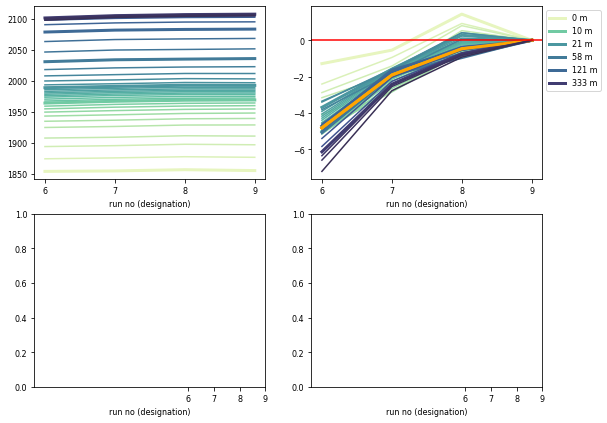

In [52]:
np.shape(PI6_var)

end_of_days = np.zeros([4,40])
end_of_days[0,:] = PI6_var[:,364]
end_of_days[1,:] = PI7_var[:,364]
end_of_days[2,:] = PI8_var[:,364]
end_of_days[3,:] = PI9_var[:,364]

end_of_days_mean = [PI6_avg[364],PI7_avg[364],PI8_avg[364],PI9_avg[364]]

depths = tmesh['gdept_1d'][:]
zdepths = depths[0]

fact = 0.7
fig, axs = plt.subplots(2,2, figsize=(13*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tcm = cm.deep; shift = 2; seg = 45
for i in range(0,40):
    td = zdepths[i]
    axs[0].plot(np.arange(6,10,1),end_of_days[:,i], color = tcm(1.*(i+shift)/seg))
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
    | (i == 27) | (i == 35 ) ) :
        axs[0].plot(np.arange(6,10,1),end_of_days[:,i],color = tcm(1.*(i+shift)/seg),\
            label = str(int(td))+' m', linewidth = 2+1)
    
    
    
    axs[1].plot(np.arange(6,10,1),end_of_days[:,i]-end_of_days[3,i], color = tcm(1.*(i+shift)/seg))
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
    | (i == 27) | (i == 35 ) ) :
        axs[1].plot(np.arange(6,10,1),end_of_days[:,i]-end_of_days[3,i],color = tcm(1.*(i+shift)/seg),\
            label = str(int(td))+' m', linewidth = 2+1)
        axs[1].legend(bbox_to_anchor = [1 ,1])

        axs[1].plot(np.arange(6,10,1),end_of_days_mean-end_of_days_mean[3], color = 'orange', linewidth = 3)

axs[1].axhline(y=0, color = 'r')


    
        
for i in range(0,4):
    axs[i].set_xticks([6,7,8,9])
    axs[i].set_xlabel('run no (designation)')

In [21]:
print(f'PI6 day 0: {PI6_avg[0]}, day 364: {PI6_avg[364]}')
print(f'PI7 day 0: {PI7_avg[0]}, day 364: {PI7_avg[364]}')
print(f'PI8 day 0: {PI8_avg[0]}, day 364: {PI8_avg[364]}')
print(f'PI9 day 0: {PI9_avg[0]}, day 364: {PI9_avg[364]}')

PI6 day 0: 2034.8233258274975, day 364: 2044.1990227789045
PI7 day 0: 2044.5121761078642, day 364: 2047.112018542339
PI8 day 0: 2047.4143008590625, day 364: 2048.5569568456467
PI9 day 0: 2048.8696682715236, day 364: 2049.026208418524


In [22]:
intr = BR3_dp-PI8_dp
print(np.shape(csize))
csize_layer1 = np.nansum(csize,axis = 1)
csize_layer = np.nansum(csize_layer1,axis = 1)
print((csize_layer))

print(np.nansum((intr*csize_layer)/np.nansum(csize_layer)))

(40, 898, 398)
[17730278930.479958 17730347370.631905 17730480673.787052
 17730740312.658318 16997176505.246202 16874149793.795547
 16751694446.911232 16646568410.42559 16514973695.297358
 16403750635.309036 16299940186.29875 16228020753.989017
 16195225772.443077 16237200199.78711 16464450409.119404
 17012657738.396297 18177117073.82859 20503377738.055313 24977582540.8144
 33341632036.200733 48181544643.08853 72610495319.3313 108627543518.70749
 151733782510.2329 189792852280.57523 210500557862.93567 209938091530.9837
 193571647210.41797 167336722040.633 134523217320.31241 101843988049.88788
 79680113283.59392 63215628838.41362 52615581231.11301 42936590524.341255
 32588706897.182045 23263168310.79526 16979418854.450266 10431313390.36983
 0.0]
35.21666207291861


In [23]:
# ax3.plot(BR3_jdf_dp-PI7_jdf_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
# ax3.plot(BR3_jdf2_dp-PI7_jdf2_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
# ax3.plot(BR3_jdf3_dp-PI7_jdf3_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

# ax3.plot(BR3_cs_dp-PI7_cs_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
# ax3.plot(BR3_cs2_dp-PI7_cs2_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
# ax3.plot(BR3_cs3_dp-PI7_cs3_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

# ax3.plot(BR3_ns_dp-PI7_ns_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
# ax3.plot(BR3_ns2_dp-PI7_ns2_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
# ax3.plot(BR3_ns3_dp-PI7_ns3_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

# ax3.plot(BR3_haro_dp-PI7_haro_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
# ax3.plot(BR3_haro2_dp-PI7_haro2_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
# ax3.plot(BR3_haro3_dp-PI7_haro3_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

# ax3.plot(BR3_dp-PI7_dp,zdepth, marker = '+', \
#          linestyle = ':', linewidth = 4, color = 'k',\
#          markersize = 10, label = 'domain-wide \n mean')

## calculate full year mean

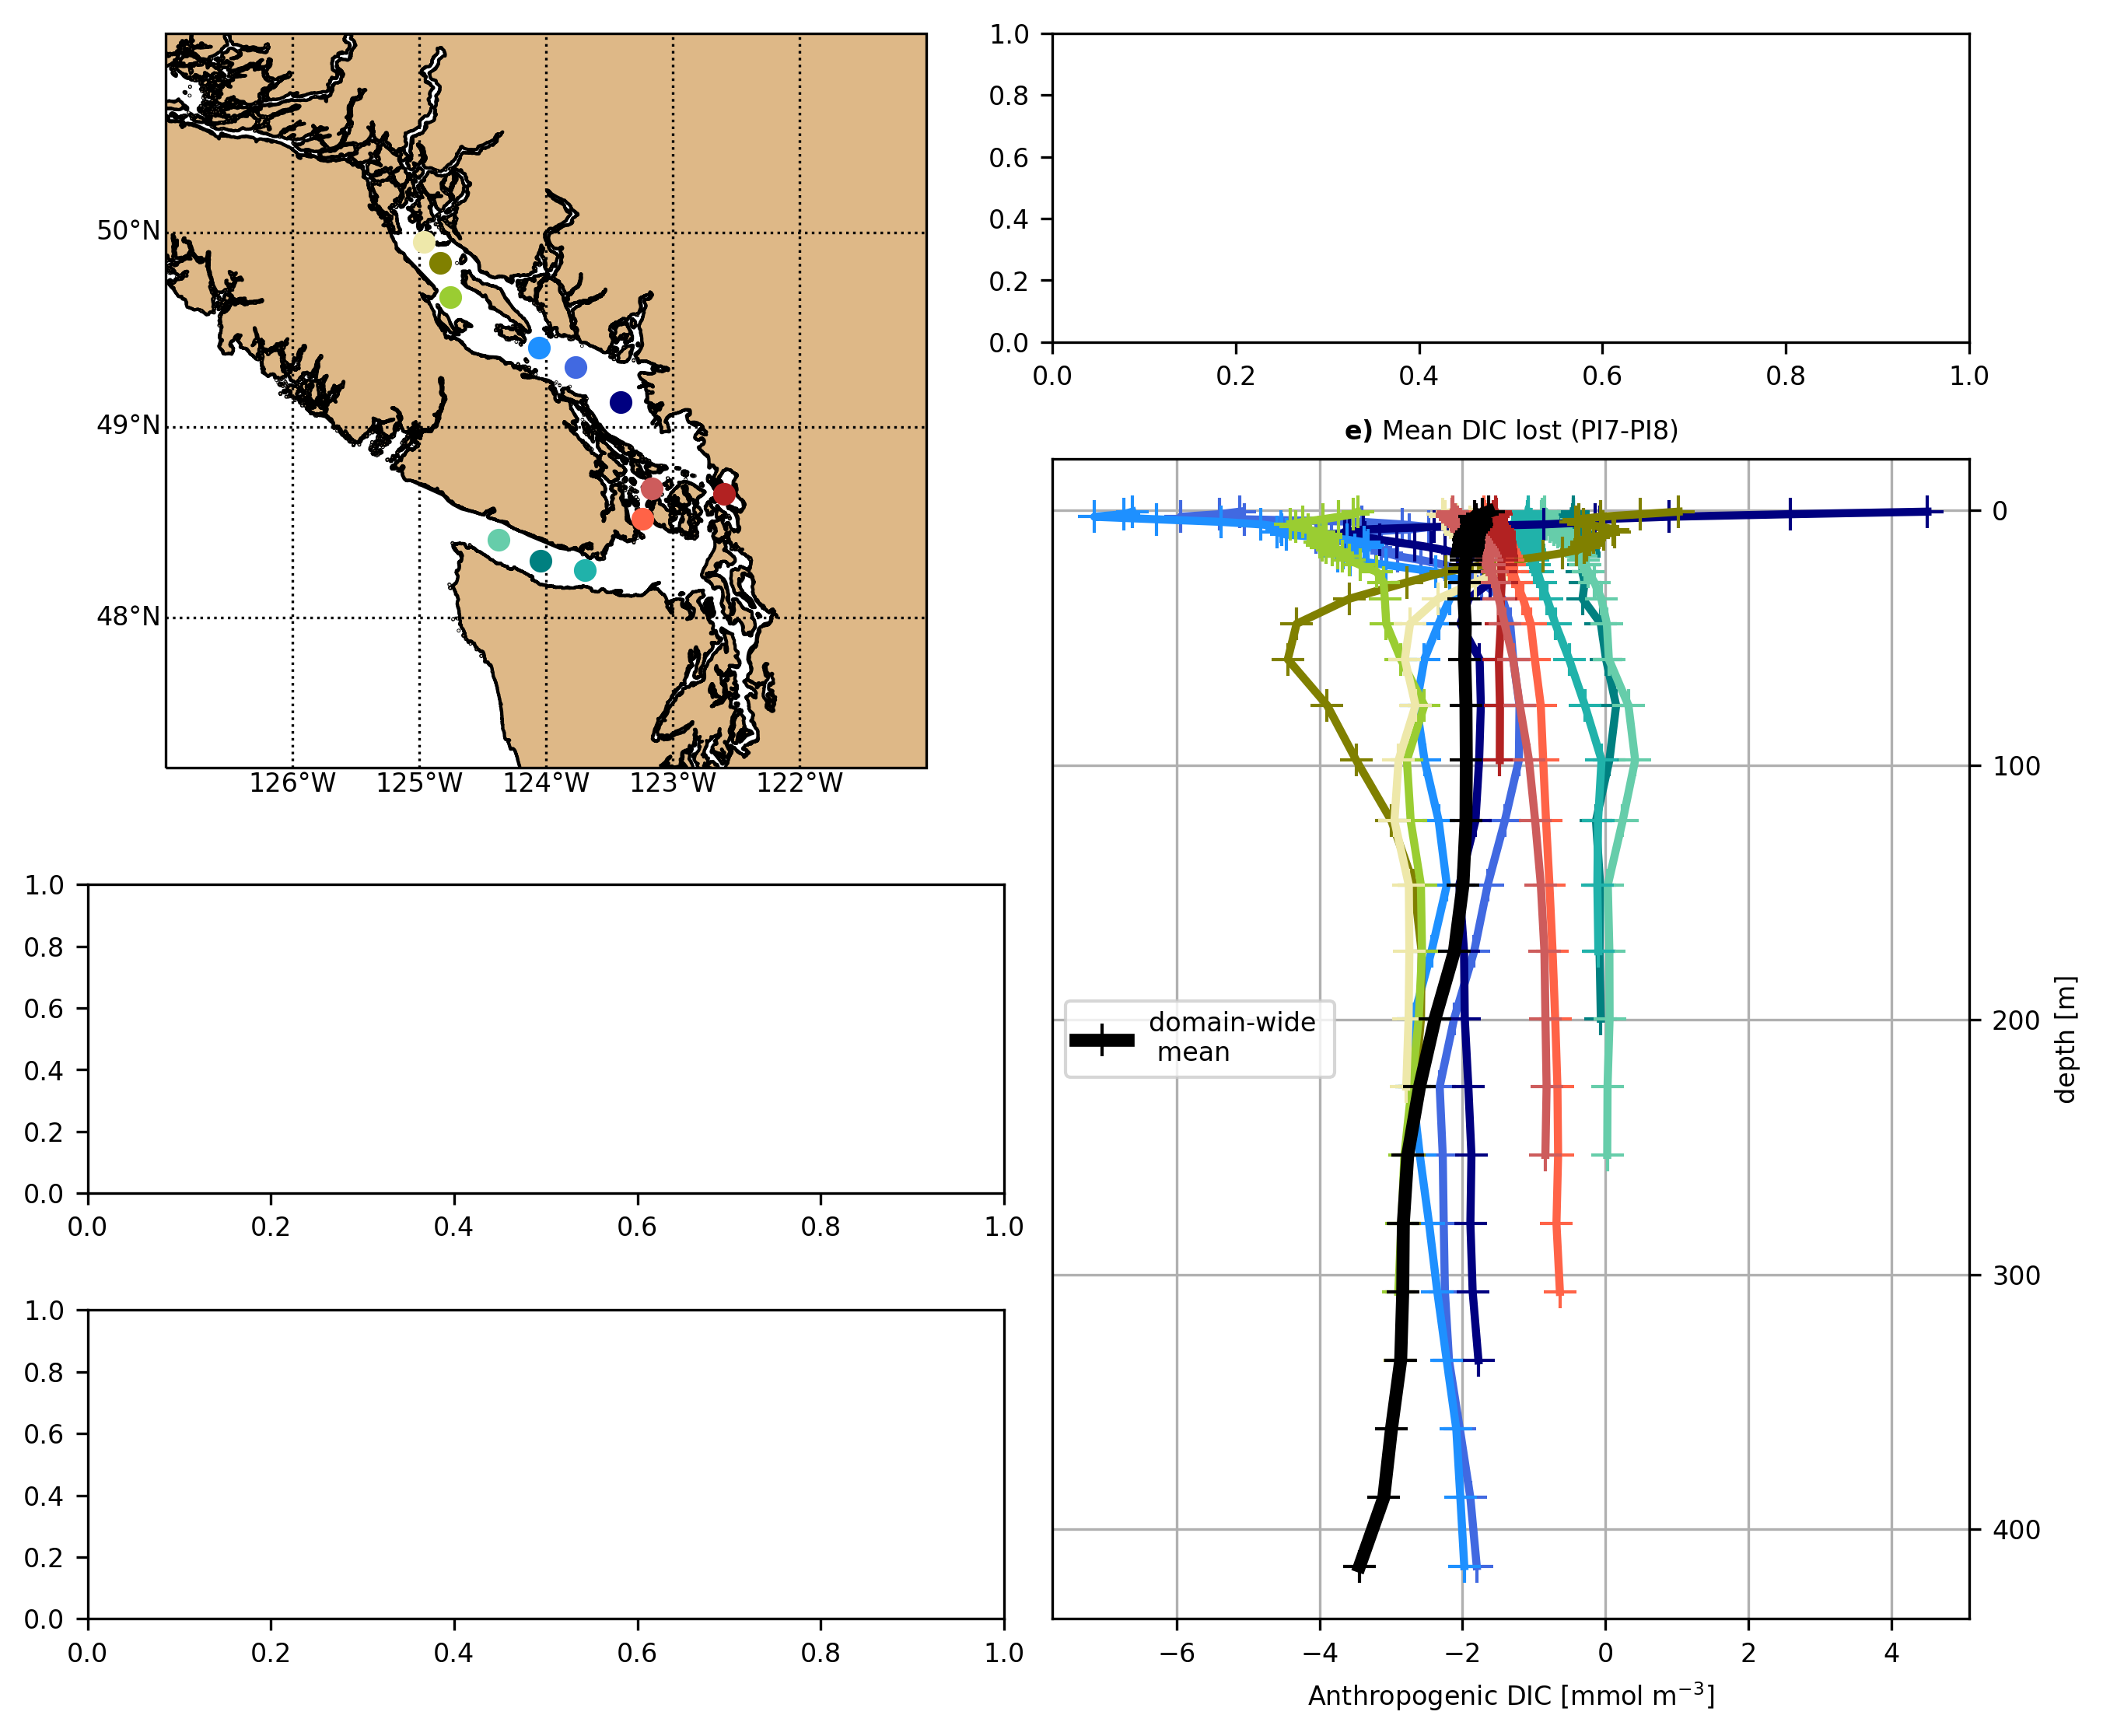

In [24]:
ms = 6

tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fact = 1/72; fs = 8
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rcParams['font.size'] = 8

#plt.rcParams["font.family"] = "cursive"
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

fig = plt.figure(figsize=(23/2.54, 19/2.54),dpi = 300)
gs = fig.add_gridspec(4, 4)

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

############# ax1 
#domain plot - BR run summer average
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')
xlim, ylim = [-128, -121.5], [47.2, 51.0]
ax = fig.add_subplot(gs[0:2, 0:2], projection=crs.Mercator(central_longitude=-124))
ax.set_extent([-127, -121, 47.2, 51.0], crs=crs.PlateCarree())

# Draw coastline
ax.coastlines()
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

for i in range(0, len(xs_list)):
    tx = xs_list[i]; ty = ys_list[i]
    tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]

    w =ax.plot(tlon,tlat,marker = 'o', color = cols_list[i], markersize=ms, transform=crs.Geodetic())

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
#gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

ax1 = plt.subplot2grid((4,4), (2,0), colspan=2, rowspan=1) 
#bio, river
ax2 = plt.subplot2grid((4,4), (3,0), colspan=2, rowspan=1) 
### thalweg
ax3 = plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=1)

ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=3) 

ax3.plot(PI7_jdf_dp-PI8_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(PI7_jdf2_dp-PI8_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(PI7_jdf3_dp-PI8_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(PI7_cs_dp-PI8_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(PI7_cs2_dp-PI8_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(PI7_cs3_dp-PI8_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(PI7_ns_dp-PI8_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(PI7_ns2_dp-PI8_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(PI7_ns3_dp-PI8_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(PI7_haro_dp-PI8_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(PI7_haro2_dp-PI8_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(PI7_haro3_dp-PI8_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(PI7_dp-PI8_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')

#ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (present-day - preindustrial) ', fontsize = 8)
ax3.set_title(r'$\bf{e)}$ Mean DIC lost (PI7-PI8)', fontsize = 8)
ax3.invert_yaxis()
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.legend(loc = 'center left', fontsize = fs)
ax3.set_xlabel('Anthropogenic DIC [mmol m$^{-3}$]', fontsize = fs)
ax3.set_ylabel('depth [m]', fontsize = fs)
ax3.grid()
plt.tight_layout()
fig.savefig('PI8loss.jpg')
# 